
1. DATA CLEANING
2. EDA (Exploratory Data Analysis)
3. TEXT PREPROCESSING
4. MODAL BUILDING
5. EVALUATION
6. IMPROVMENT
7. WEBSITE


1 DATA CLEANING

### 1.1 Importing the libraries

In [226]:
import numpy as np # to work with large multidimensional array
import pandas as pd # to handle and analyze datasets

### 1.2 Importing datasets

In [227]:
dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')
# encoding is necessary to avoid errors
dataset.sample(5) #taking out 5 rows from the dataset randomly

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2459,ham,I have had two more letters from . I will copy...,NaN,NaN,NaN
2010,ham,And how's your husband.,NaN,NaN,NaN
2170,ham,\YEH I AM DEF UP4 SOMETHING SAT,JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aï¿½50 PA...,NaN,NaN
2191,ham,Ya it came a while ago,NaN,NaN,NaN
2590,ham,Oh... Lk tt den we take e one tt ends at cine ...,NaN,NaN,NaN


### 1.3 Data cleaning

#### Drop last 3 cloumn

In [228]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
# unamed 2,3,4 are removed as they contain very less values required
dataset.sample(5)

,v1,v2
3544,ham,And now electricity just went out fml.
2531,ham,I'll talk to the others and probably just come...
878,ham,I don't think I can get away for a trek that l...
442,ham,"Not sure yet, still trying to get a hold of him"
3340,ham,Ugh hopefully the asus ppl dont randomly do a ...


#### Rename column

In [229]:
dataset.rename(columns={'v1':'Output','v2':'Text'},inplace=True)
# changing column names and inplace is used to make changes in the original dataset
dataset.sample(5)

,Output,Text
180,ham,Hi! You just spoke to MANEESHA V. We'd like to...
1972,ham,"If we hit it off, you can move in with me :)"
3856,ham,Dad says hurry the hell up
3772,ham,I know you mood off today
2206,ham,IM GONNA MISS U SO MUCH


## 1.4 Encoding categorical data

In [230]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder used to label values as 0 and 1
lb=LabelEncoder()
dataset['Output']=lb.fit_transform(dataset['Output'])
dataset.head() # displays first few rows of dataset


,Output,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 1.5 Take care for Missing &&  Duplicate data


#### Checking missing data


In [231]:
dataset.isnull().sum()
# sum() counts number of true values when used with boolean dataset

Output    0
Text      0
dtype: int64

#### Checking duplicatedata

In [232]:
dataset.duplicated().sum()

467

#### Removing Duplicate


In [233]:
dataset=dataset.drop_duplicates(keep='first')
dataset.duplicated().sum()

0

# 2. EDA( Exploratory Data Analysis )



## 2.1 Data Analysis

In [234]:
dataset['Output'].value_counts()
# to check data for number of ham and spam

Output
0    4572
1     706
Name: count, dtype: int64

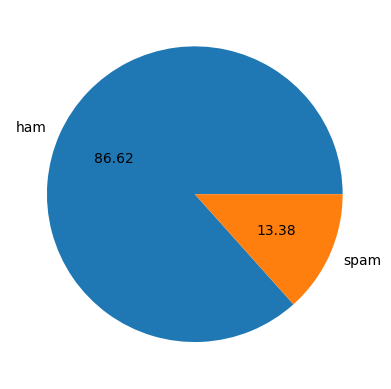

In [235]:
# importing pyplot for better data visualization - in form of pie chart
import matplotlib.pyplot as plt
# creating a pie chart with labels and generating its presence percentage
plt.pie(dataset['Output'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show() # removing unwanted code

## 2.2 Installing and Importing NLTK( Natural Language Toolkit ) - for classification, tokenization, etc.


### Installing

In [236]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing

In [237]:
import nltk
nltk.download('punkt')
# punkt is a pre-trained model for tokenization(words, sentences, characters)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2.3 Tokenization

#### Character Tokenization

In [238]:
# finding the length of the characters in a sentence.
# making another column 'num_char'
dataset['num_char'] = dataset['Text'].apply(len)
dataset.head()

,Output,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### Word Tokenization

In [239]:
# breaking the Text into each word and finding length
dataset['num_words'] = dataset['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset.head()

,Output,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


#### Sentence Tokenization

In [240]:
# breaking the Text into each sentence and finding length
dataset['num_sent'] = dataset['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
dataset.head()

,Output,Text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## Summary

#### Overall Summary

In [241]:
# describe() is a Panda method to generate statistics of the dataset
dataset[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5278.000000,5278.000000,5278.00000
mean,79.043767,18.394657,1.97158
std,57.808039,13.207739,1.43640
min,2.000000,1.000000,1.00000
25%,36.000000,9.000000,1.00000
50%,61.000000,15.000000,2.00000
75%,115.000000,26.000000,2.00000
max,910.000000,220.000000,38.00000


#### Ham Summary

In [242]:
dataset[dataset['Output'] == 0] [['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4572.000000,4572.000000,4572.000000
mean,70.587270,17.086614,1.823053
std,56.132142,13.423187,1.376575
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### Spam Summary

In [243]:
dataset[dataset['Output'] == 1] [['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,706.000000,706.000000,706.000000
mean,133.807365,26.865439,2.933428
std,33.429205,7.385074,1.444908
min,13.000000,2.000000,1.000000
25%,121.250000,23.000000,2.000000
50%,147.000000,28.000000,3.000000
75%,157.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


#### Summary Representation using Histogram

<Axes: xlabel='num_char', ylabel='Count'>

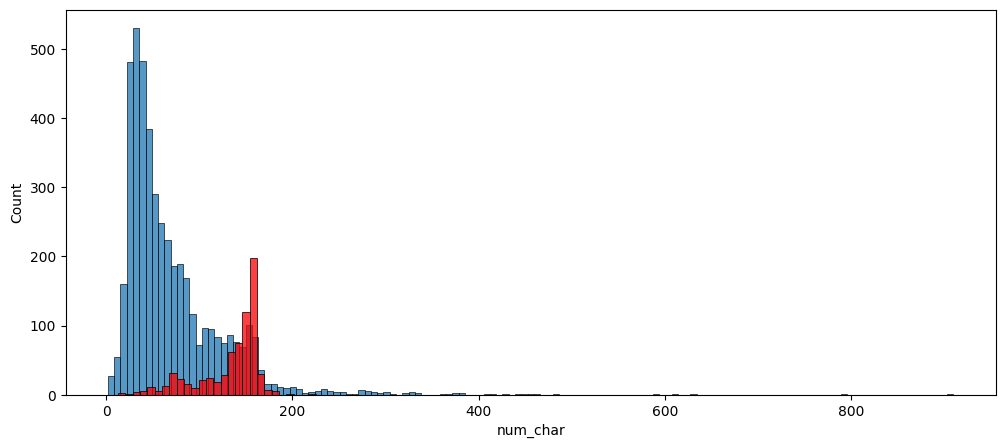

In [244]:
import seaborn as sns        # used to create histogram plot
plt.figure(figsize=(12,5))   # resizing the figure
# Plotting histogram taking num-char as the factor
sns.histplot(dataset[dataset['Output'] == 0]['num_char'])             # histogram for ham
sns.histplot(dataset[dataset['Output'] == 1]['num_char'],color='red') # histogram for spam

##### Analyzing Correlation

In [245]:
 # Creating a correlation matrix

# 3. Data Preprocessing


*   Lower Case
*   Tokenization
*   Removing Special Characters
*   Removing Stop Words and Punctuation
*   Stemming







In [246]:
#function to perform all these data preprocessing process

import string #import punctutation marks
import nltk #nltk library imported
nltk.download('stopwords') #Downloading stopwords- these have no or little meaning in the document(eg:"the","and","is","in",etc)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #for stemming
ps =PorterStemmer()

def Transform_text(text):
    text=text.lower()     #Convert all textual data to Lower Case
    text=nltk.word_tokenize(text)   #Performing Word-Tokenization i.e converting them into separate words

    y=[]                  #it is variable which is a List.

    #Removing Special Characters

    for i in text:        #for loop for traversing each word
        if i.isalnum():   #if i is alpha-numeric it will be appended to List y and others will be removed.
            y.append(i)
    text=y[:]             #assigning list y back to text
    y.clear()             #clearing y

    #Removing Stop Words and Punctuation

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:   #if i is not in stopwards as well as punctuation
            y.append(i)                                                           #it will be appended to i

    text=y[:]
    y.clear()

    #Stemming-reducing the words to base root form
    for i in text:
        y.append(ps.stem(i))   #converting each word to root from
    return " ".join(y)     #returning the root words in form of string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [247]:
#Saving the above changes into a new column: Transformed_Text
dataset['Transformed_Text']=dataset['Text'].apply(Transform_text)
dataset.head()

,Output,Text,num_char,num_words,num_sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### formation of word cloud

In [248]:
from wordcloud import WordCloud       #to show important words in bigger font format
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

<Figure size 1500x800 with 0 Axes>

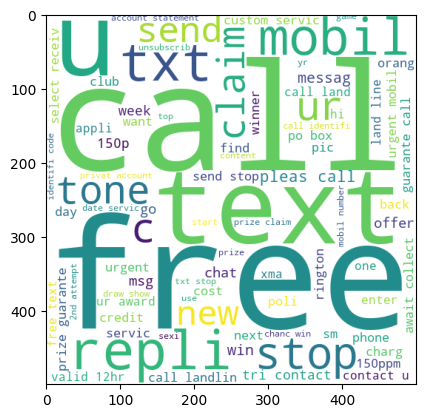

<Figure size 1500x800 with 0 Axes>

In [249]:
#spam wordcloud
spam_wc = wc.generate(dataset[dataset['Output'] == 1]['Transformed_Text'].str.cat(sep=" "))    #sep means separate
#from Output we are extracting Transformed_text column and concatenate with space
plt.imshow(spam_wc)
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

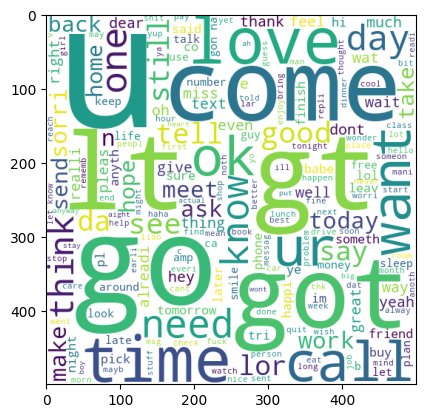

<Figure size 1500x800 with 0 Axes>

In [250]:
#Ham word cloud
ham_wc = wc.generate(dataset[dataset['Output'] == 0]['Transformed_Text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.figure(figsize=(15,8))


In [251]:
dataset.head()

,Output,Text,num_char,num_words,num_sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [252]:
print(dataset.columns)

Index(['Output', 'Text', 'num_char', 'num_words', 'num_sent',
       'Transformed_Text'],
      dtype='object')


In [253]:
spam_corpus = []        #empty list
#iterate over each message of spam and convert it into list
for msg in dataset[dataset['Output'] == 1]['Transformed_Text'].tolist():
  for word in msg.split():      #splitting each word
    spam_corpus.append(word)    #appending each word in empty list spam_corpus

In [254]:
len(spam_corpus) #total length of spams

10337

# Model Building

In [255]:
 #Naïve Bayes Classifier Algorithm ( Naive Bayes uses probability to make predictions)
 # we use this because
 # as for textual data this algorithm works best

 # 1st we have to convert the text into vectors or tokens.

 #  process we have
     #bag of words (vectorize using bag of words)
    # then give as input in naive bayes

In [256]:
# VECTORIZATION
#it transforms a set of text data into a numerical format
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #Term Frequency-Inverse Document Frequency
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [257]:
X = tfidf.fit_transform(dataset['Transformed_Text']).toarray()

In [258]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [259]:
print (X.shape)

(5278, 3000)


In [260]:
y = dataset['Output'].values
print(y)

[0 0 1 ... 0 0 0]


## Splitting the dataset into the Training set and Test set

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)  #X is feature matrix y is target variable x-features y- labels

from sklearn.metrics import precision_score,confusion_matrix,accuracy_score

#### Importing naive bayes algorithms


In [263]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

#### Applying naive bayes algorithms

#### 1.Gaussian naive Bayes(good at handling boolean attributes)

In [264]:
gnb.fit(X_train,y_train)
y_predict1=gnb.predict(X_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))  #we want precision score is high because of imbalanced data

0.8617424242424242
[[787 128]
 [ 18 123]]
0.4900398406374502


#### 2.Multonimial Naive bayes(good at handling discrete values)

In [265]:
mnb.fit(X_train,y_train)
y_predict2=mnb.predict(X_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

# used this one because of high precision_score

0.9753787878787878
[[914   1]
 [ 25 116]]
0.9914529914529915


#### 3. Bernoulli Naive Bayes(good at handling continuos values)

In [266]:
bnb.fit(X_train,y_train)
y_predict3=bnb.predict(X_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9791666666666666
[[911   4]
 [ 18 123]]
0.968503937007874


### Choosen mnb(Multonimial Naive bayes) due to its high precision score

In [267]:
from sklearn.svm import SVC # Support Vector Machine algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [268]:
# used two more classifiers
svc = SVC(kernel='linear', C=1.0)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

#### Dictionary of Classifiers

In [269]:
clfs={
    'SVC':svc,
    'RF':rfc,
    'NB':mnb,
}

In [270]:
def train_classifier(clf, x_train, y_train, x_test, y_test):

    clf.fit(x_train, y_train)

    # Print the training and testing accuracy
    y_pred=clf.predict(x_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy , precision

In [271]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9744318181818182, 0.975)

In [272]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
  current_accuracy , current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
  print("for" , name)
  print("Accuracy" , current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for SVC
Accuracy 0.9744318181818182
Precision 0.975
for RF
Accuracy 0.9706439393939394
Precision 0.9824561403508771
for NB
Accuracy 0.9753787878787878
Precision 0.9914529914529915


In [273]:
performance_dataset = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores})

In [274]:
performance_dataset

,Algorithm,Accuracy,Precision
0,SVC,0.974432,0.975000
1,RF,0.970644,0.982456
2,NB,0.975379,0.991453


In [275]:
 input_message =  "URGENT: Your mobile number has won a cash prize. Reply 'WIN' to claim your money."

In [276]:
def predict_spam(txt):
    try:
        # Preprocess the input message
        transformed_txt = Transform_text(txt)
        
        # Ensure that tfidf is properly initialized
        message_vectorized = tfidf.transform([transformed_txt])
        

        # Make a prediction using the Multinomial Naive Bayes model
        prediction = clfs['NB'].predict(message_vectorized)

        # Return the prediction
        return prediction[0]
    except Exception as e:
        print(f"An error occurred: {e}")
        return None  


In [277]:
# Model output
output_nb = predict_spam(input_message)
print(f"output:{output_nb}")
print(f"Input Message: {input_message}")
print(f"Transformed Message: {Transform_text(input_message)}")
print(f"Prediction (Naive Bayes): {'Spam' if output_nb == 1 else 'not Spam'}")

output:1
Input Message: URGENT: Your mobile number has won a cash prize. Reply 'WIN' to claim your money.
Transformed Message: urgent mobil number cash prize repli claim money
Prediction (Naive Bayes): Spam


**MODEL BUILDING COMPLETE**

In [278]:
import pickle

In [280]:

with open('Transform_text1.pkl', 'wb') as file:
    pickle.dump(Transform_text, file)